In [1]:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')
df.head()    ## 상위 5개 출력

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.describe()    ## numeric variable 에 대한 stats 제공, 모든 변수가 포함되진 않음

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.shape

(1338, 7)

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
## 전체 값 갯수
print(f'age: {df.age.count()}')
print(f'sex: {df.sex.count()}')
print(f'bmi: {df.bmi.count()}')
print(f'children: {df.children.count()}')
print(f'smoker: {df.smoker.count()}')
print(f'region: {df.region.count()}')
print(f'charges: {df.charges.count()}')

age: 1338
sex: 1338
bmi: 1338
children: 1338
smoker: 1338
region: 1338
charges: 1338


In [10]:
## 유니크한 값 갯수
print(f'age: {df.age.nunique()}')
print(f'sex: {df.sex.nunique()}')
print(f'bmi: {df.bmi.nunique()}')
print(f'children: {df.children.nunique()}')
print(f'smoker: {df.smoker.nunique()}')
print(f'region: {df.region.nunique()}')
print(f'charges: {df.charges.nunique()}')

age: 47
sex: 2
bmi: 548
children: 6
smoker: 2
region: 4
charges: 1337


In [12]:
## 변수 타입
print(f'age: {df.age.dtype}')
print(f'sex: {df.sex.dtype}')
print(f'bmi: {df.bmi.dtype}')
print(f'children: {df.children.dtype}')
print(f'smoker: {df.smoker.dtype}')
print(f'region: {df.region.dtype}')
print(f'charges: {df.charges.dtype}')

age: int64
sex: object
bmi: float64
children: int64
smoker: object
region: object
charges: float64


In [14]:
## 정수형인지?
print(f'age: {pd.api.types.is_numeric_dtype(df.age)}')
print(f'sex: {pd.api.types.is_numeric_dtype(df.sex)}')
print(f'bmi: {pd.api.types.is_numeric_dtype(df.bmi)}')
print(f'children: {pd.api.types.is_numeric_dtype(df.children)}')
print(f'smoker: {pd.api.types.is_numeric_dtype(df.smoker)}')
print(f'region: {pd.api.types.is_numeric_dtype(df.region)}')
print(f'charges: {pd.api.types.is_numeric_dtype(df.charges)}')

age: True
sex: False
bmi: True
children: True
smoker: False
region: False
charges: True


In [ ]:
## NULL 값이 있는지?
print(f'age: {df.age.isnull().sum()}')
print(f'sex: {df.sex.isnull().sum()}')
print(f'bmi: {df.bmi.isnull().sum()}')
print(f'children: {df.children.isnull().sum()}')
print(f'smoker: {df.smoker.isnull().sum()}')
print(f'region: {df.region.isnull().sum()}')
print(f'charges: {df.charges.isnull().sum()}')

## Boundaries

In [18]:
import numpy as np

print(df.charges.count())
print(df.charges.min())         ## 최솟값
print(df.charges.quantile(.25)) ## 25%
print(df.charges.quantile(.50)) ## 50%   -> 실제 값은 아님
print(df.charges.quantile(.75)) ## 75%
print(df.charges.max())         ## 최댓값
print()
print(df.charges.mean())        ## 평균값
print(df.charges.median())      ## 중앙값
print(df.charges.mode())        ## 최빈값을 모두 출력

1338
1121.8739
4740.28715
9382.033
16639.912515
63770.42801

13270.422265141257
9382.033
0    1639.5631
Name: charges, dtype: float64


## Standard Deviation
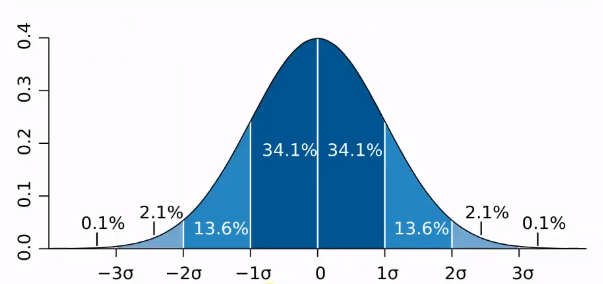

In [23]:
df.charges.std()    ## pandas는 표본표준편차(ddof=1)를 default로 한다.

12110.011236693994

In [22]:
np.std(df.charges)  ## numpy는 모표준편차(ddof=0)를 default로 한다.

12105.484975561605

In [24]:
np.std(df.charges, ddof=1)  ## numpy.std에 ddof=1 로 명시해주면 표본표준편차를 계산할 수 있음

12110.011236693994

## Skewness & Kurtosis (왜도 & 척도)
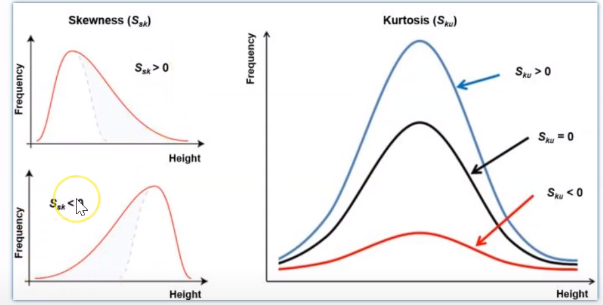

In [28]:
from scipy.stats import kurtosis, skew

print(skew(df.charges, bias=False))
print(kurtosis(df.charges, bias=False))

1.5158796580240383
1.6062986532967916


In [30]:
print(df.charges.skew())
print(df.charges.kurt())
## 둘 다 양수이므로 왼쪽으로 기울고, 정규분포보다 뾰족한 형태

1.5158796580240388
1.6062986532967907
